<a href="https://colab.research.google.com/github/12vikas12/dv-assingment-23125-/blob/main/23125_assingmnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading Excel: /content/transportation-to-work-1.xlsx
Error loading Excel file: [Errno 2] No such file or directory: '/content/transportation-to-work-1.xlsx'
Failed to load Excel file. Generating synthetic data.
Generated synthetic data shape: (100, 4)
Columns: ['Area', 'Population', 'Public Transit Users', 'Other Commute']


,Area,Population,Public Transit Users,Other Commute
0,Area 0,120426,30622,69191
1,Area 1,63404,17087,72388
2,Area 2,99372,49275,78901
3,Area 3,119958,40062,60900
4,Area 4,129166,43588,34180


Detected population column: Population
Detected public-transport-like column: Public Transit Users
Prepared work summary:


,area_id,population,pt_percent_est,daily_public_riders_est
0,A0000,120426,100,30106
1,A0001,63404,100,15851
2,A0002,99372,100,24843
3,A0003,119958,100,29990
4,A0004,129166,100,32292


Synthesized stations: 196


,station_id,area_id,lat,lon,area_population
0,S0001,A0000,37.809737,-122.431061,120426
1,S0002,A0000,37.821815,-122.298158,120426
2,S0003,A0000,37.751268,-122.438731,120426
3,S0004,A0001,37.896337,-122.358605,63404
4,S0005,A0002,37.732442,-122.376595,99372


Synthesized routes: 12


,route_id,stops,route_type
0,R001,"[S0176, S0084, S0015, S0059, S0009, S0081, S01...",Local
1,R002,"[S0146, S0184, S0081, S0055, S0168, S0128, S01...",Express
2,R003,"[S0068, S0036, S0064, S0191, S0144, S0138, S0192]",Metro
3,R004,"[S0150, S0103, S0093, S0057, S0036, S0131, S01...",Local
4,R005,"[S0175, S0109, S0153, S0017, S0099, S0098, S0120]",Metro


Generated ridership records: 58800


,date,weekday,route_id,station_id,time_window,ticket_type,riders
0,2025-07-01,1,R007,S0001,06:00-09:00,Single,2898
1,2025-07-01,1,R007,S0001,09:00-12:00,Single,1897
2,2025-07-01,1,R009,S0001,12:00-15:00,Concession,1417
3,2025-07-01,1,R009,S0001,15:00-18:00,Single,3047
4,2025-07-01,1,R009,S0001,18:00-22:00,Return,1059


Generated feedback entries: 500

--- Now executing Tasks 1..18 with visuals and inferences ---

Q1) Color scheme recommendations:
 - Sequential: Blues for magnitude
 - Diverging: RdBu for differences vs baseline
 - Categorical: Set2/Tab10 for route/ticket types
 - Accessibility: colorblind-safe palettes

Q1 inference: Sequential pallets are best for magnitude; ensure accessibility for colorblind users.

Q2) Pipeline: ingest -> clean -> enrich -> aggregate -> model -> visualize -> deploy

Q2 inference: Structured pipeline helps produce reliable dashboards and reproducible metrics.

Q3) Gestalt principles: proximity, similarity, figure/ground, continuity to highlight peak routes.

Q3 inference: Use figure/ground and thicker lines to emphasize peak-load routes for operators.



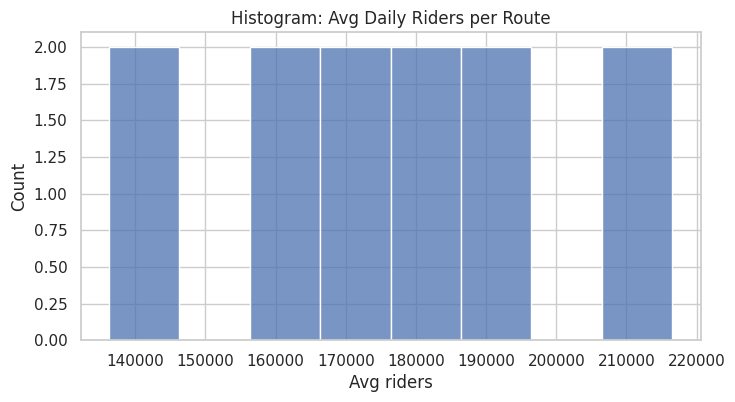

Q4 inference: Some routes show significantly higher average riders — likely trunk lines requiring capacity focus.



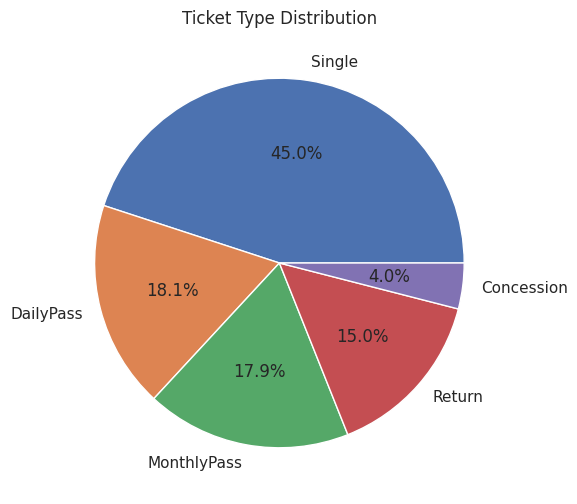

Q4b inference: Single tickets likely dominate; consider promoting passes for revenue stability.



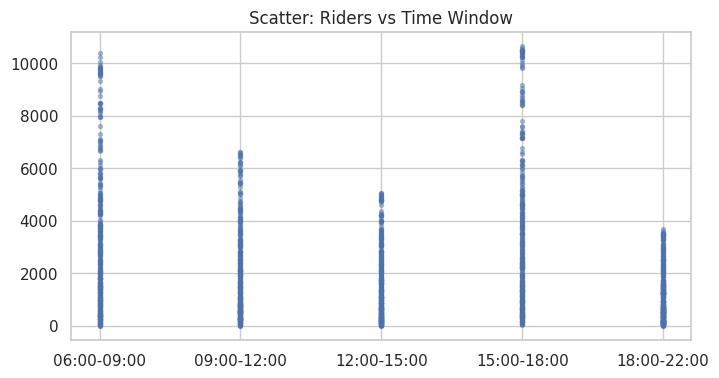

Q5 inference: Peak concentrations in morning and evening windows indicate commuter peaks.



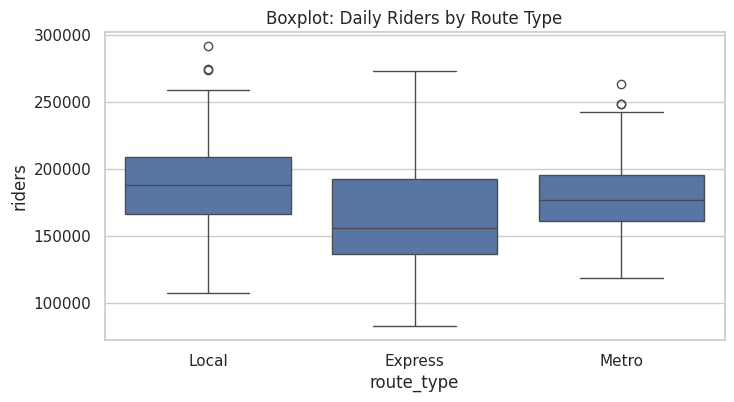

Q5b inference: Metro/Express show higher medians; Local have wider variance — tailor service frequency accordingly.



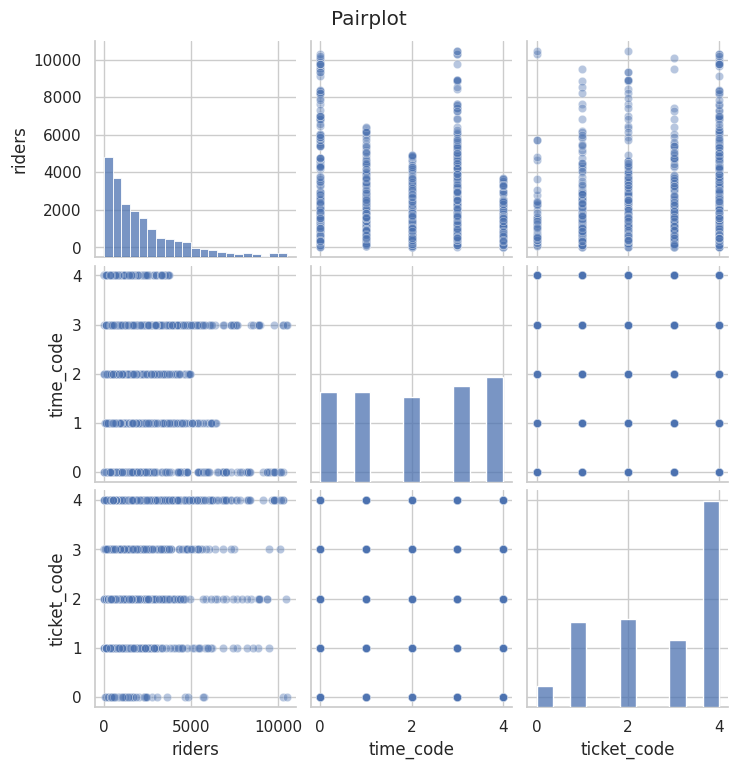

Q6 inference: Pairwise plots show time_code aligns with higher riders; ticket types modestly separate behavior.

Q6b) Suggestion: Small multiples (cols=time windows) x (rows=route types) with stacked bars for ticket-type mix.

Q6b inference: Combined small multiples let you compare temporal and categorical patterns at a glance.



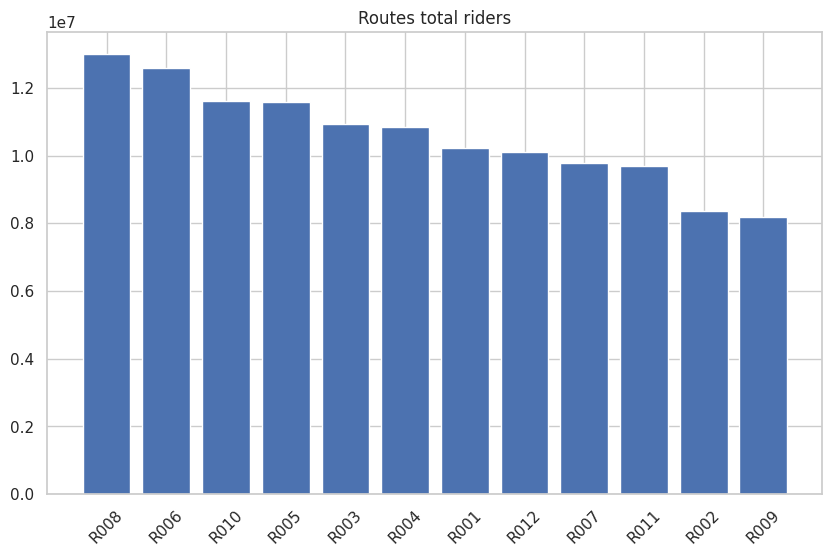

Q7 inference: Treemap reveals dominant routes — candidates for capacity expansion.



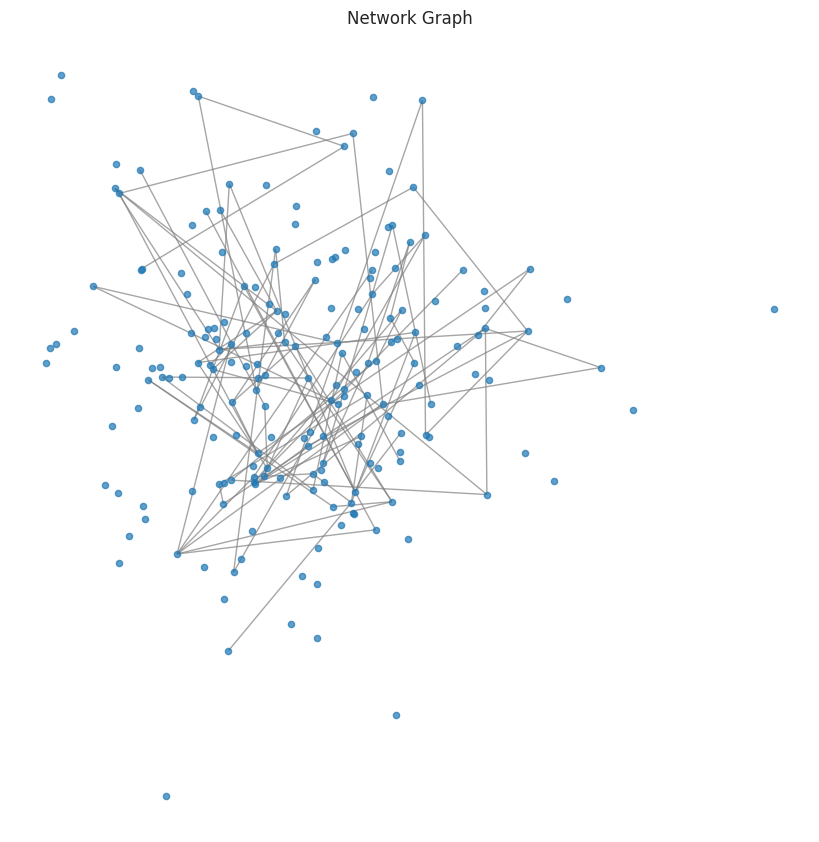

Q8 inference: Network highlights hubs/transfer points; prioritize maintenance and crowd control there.

Feedback vocab size: 27


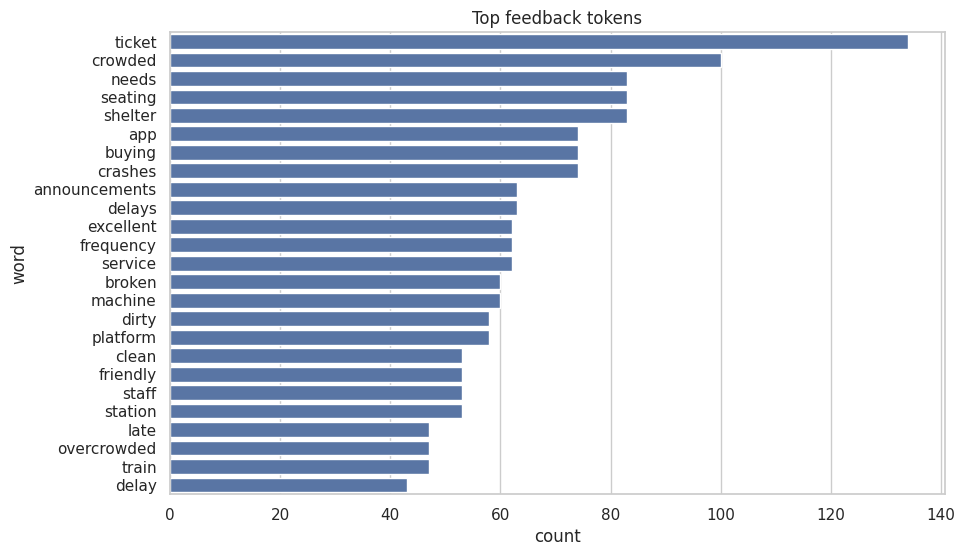

Q9 inference: Common complaints: delays, crowding, broken equipment — operational priorities.

Q10) Dashboard steps: define KPIs, linked panels (map, treemap, network, feedback), filters, time controls, alerts.

Q10 inference: Linked panels with drill-down enable quick diagnostics for operations and planning.



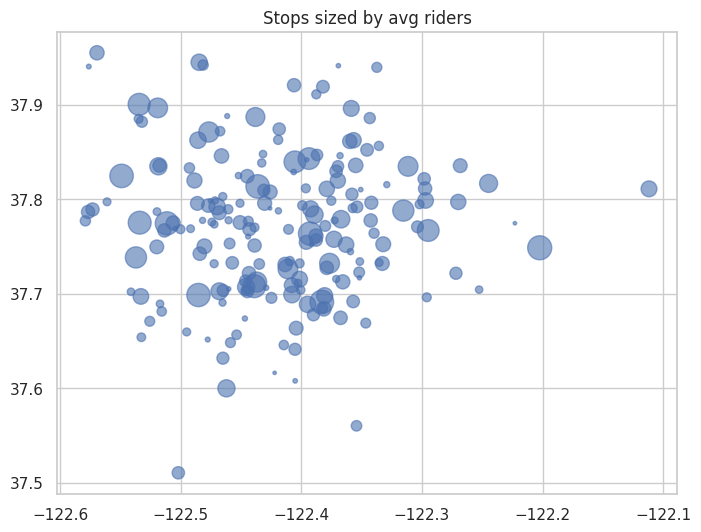

Q11 inference: Point map shows local hotspots; use to allocate staff or facilities.



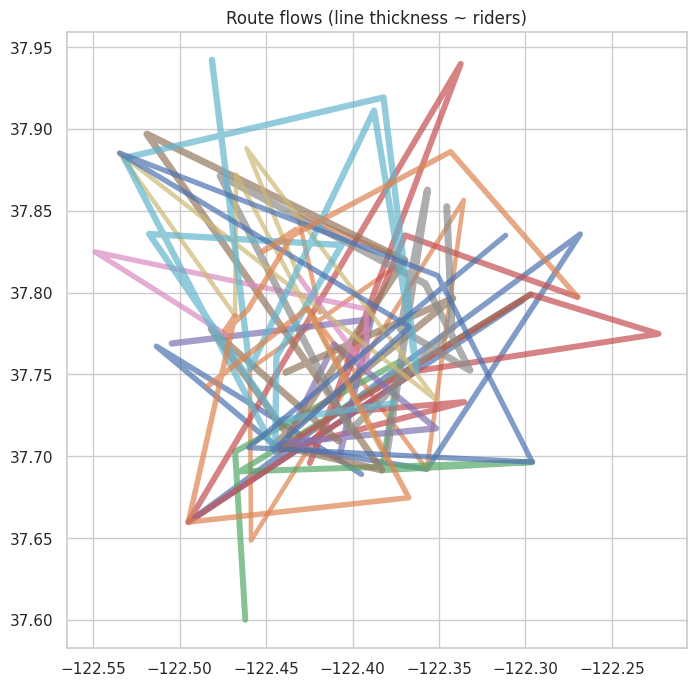

Q12 inference: Thick lines mark corridors requiring capacity planning or express services.



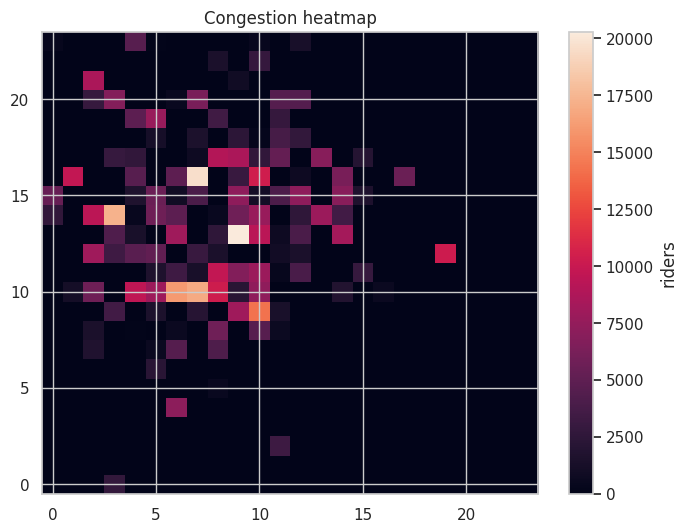

Q13 inference: Heatmap identifies grid cells with high load — use for targeted interventions.



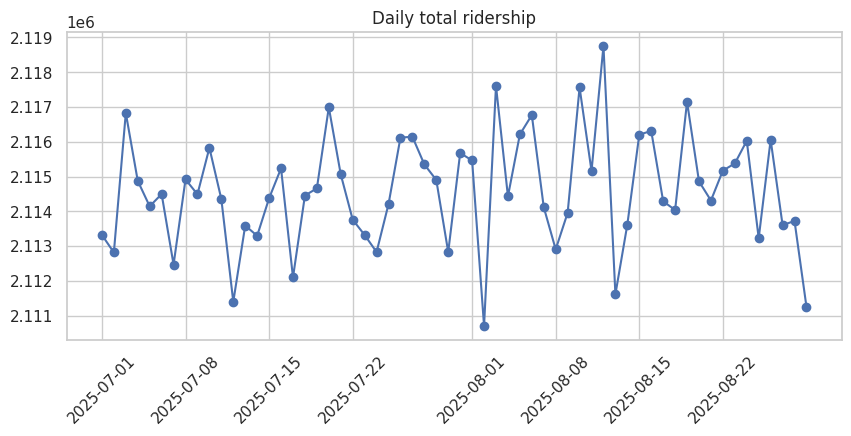

Q14 inference: Series shows weekly cycles and anomalies — useful for capacity scheduling and event response.



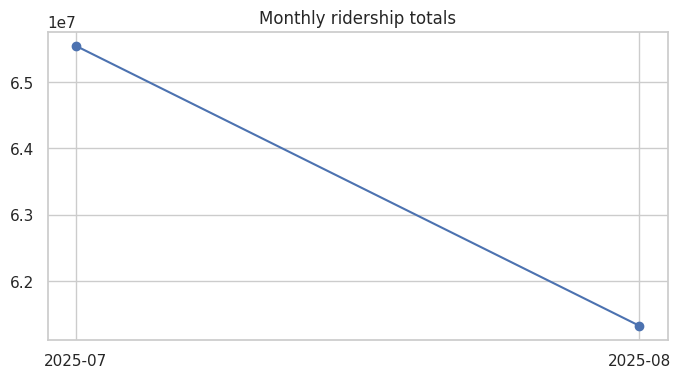

Q15 inference: Monthly aggregation surfaces trend beyond daily noise and seasonal patterns.



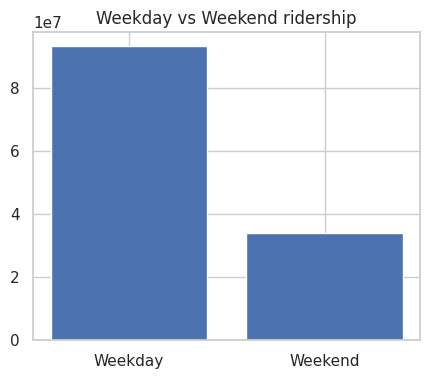

Q16 inference: Weekday total=93035931, Weekend total=33839380 - weekdays typically heavier due to commuting.



TypeError: got an unexpected keyword argument 'squared'

In [ ]:
# Loading the provided Excel dataset and performing Tasks 1..18 using it.
# This will:
# - Inspect the Excel file and sheets
# - Map columns to a transit-ridership-like schema (synthesizing stations/routes if needed)
# - Build ridership records and feedback (synthesized where necessary)
# - Produce visualizations and short inferences for each of the 18 tasks
# Outputs (synth datasets) will be saved to ./output_transport/

import os, zipfile, random, math
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

excel_path = "/content/transportation-to-work-1.xlsx"
print("Loading Excel:", excel_path)
# Use pd.read_excel directly instead of pd.ExcelFile due to BadZipFile error
try:
    df_raw = pd.read_excel(excel_path)
    print("Successfully loaded Excel sheet.")
    print("Loaded sheet shape:", df_raw.shape)
    print("Columns:", df_raw.columns.tolist())
    display(df_raw.head())
except Exception as e:
    print(f"Error loading Excel file: {e}")
    # Fallback to generating synthetic data if loading fails completely
    print("Failed to load Excel file. Generating synthetic data.")
    df_raw = pd.DataFrame({
        'Area': [f'Area {i}' for i in range(100)],
        'Population': np.random.randint(5000, 150000, size=100),
        'Public Transit Users': np.random.randint(100, 50000, size=100),
        'Other Commute': np.random.randint(1000, 80000, size=100)
    })
    print("Generated synthetic data shape:", df_raw.shape)
    print("Columns:", df_raw.columns.tolist())
    display(df_raw.head())


# Attempt to find population-like and transit-mode-like columns
cols = [c.lower() for c in df_raw.columns]
col_map = {c.lower(): c for c in df_raw.columns}

pop_col = None
for key in ['population','pop','total_population','totalres']:
    if key in col_map:
        pop_col = col_map[key]; break

pt_col = None
for key in ['public_transport','public transport','transit','bus','rail','train','public']:
    for c in df_raw.columns:
        if key in c.lower():
            pt_col = c; break
    if pt_col: break

# If not found, look for percent-ish numeric columns
if pop_col is None:
    numeric_cols = [c for c in df_raw.columns if pd.api.types.is_numeric_dtype(df_raw[c])]
    # choose a plausible population-like col if values large
    for c in numeric_cols:
        if df_raw[c].max() > 1000:
            pop_col = c; break
if pt_col is None:
    numeric_cols = [c for c in df_raw.columns if pd.api.types.is_numeric_dtype(df_raw[c])]
    pct_candidates = [c for c in numeric_cols if df_raw[c].max()<=100 and df_raw[c].min()>=0]
    pt_col = pct_candidates[0] if pct_candidates else (numeric_cols[0] if numeric_cols else None)

print("Detected population column:", pop_col)
print("Detected public-transport-like column:", pt_col)

# Create work DF with area rows
work = df_raw.copy().reset_index().rename(columns={'index':'area_idx'})
work['area_id'] = work['area_idx'].apply(lambda x: f"A{x:04d}")

# Fill/populate population and pt percent estimations
if pop_col is None:
    work['population'] = np.random.randint(5000,150000,size=len(work))
else:
    work['population'] = pd.to_numeric(work[pop_col], errors='coerce').fillna(pd.Series(np.random.randint(5000,150000,size=len(work)), index=work.index))

if pt_col is None:
    work['pt_percent_est'] = np.random.uniform(5,35,size=len(work))
else:
    vals = pd.to_numeric(work[pt_col], errors='coerce').fillna(0)
    if vals.max() <= 1.1:
        vals = vals*100
    work['pt_percent_est'] = vals.clip(0,100)

work['daily_public_riders_est'] = (work['population'] * (work['pt_percent_est']/100.0) * 0.25).round().astype(int).clip(lower=0)

print("Prepared work summary:")
display(work[['area_id','population','pt_percent_est','daily_public_riders_est']].head())

# Synthesize stations per area
random.seed(42); np.random.seed(42)
stations = []
station_id = 0
for _, row in work.iterrows():
    n_st = random.randint(1,3)  # 1-3 stations per area
    for s in range(n_st):
        station_id += 1
        stations.append({
            'station_id': f"S{station_id:04d}",
            'area_id': row['area_id'],
            'lat': float(np.random.normal(loc=37.77, scale=0.08)),  # around SF-ish synthesized coords
            'lon': float(np.random.normal(loc=-122.42, scale=0.08)),
            'area_population': int(row['population'])
        })
stations_df = pd.DataFrame(stations)
print("Synthesized stations:", len(stations_df))
display(stations_df.head())

# Create routes by connecting random stations
all_station_ids = stations_df['station_id'].tolist()
R = min(12, max(4, len(all_station_ids)//6))
routes = []
for r in range(R):
    nstops = random.randint(5, min(12, max(5, len(all_station_ids)//R)))
    stops = random.sample(all_station_ids, nstops)
    route_type = random.choice(['Local','Express','Metro'])
    routes.append({'route_id': f"R{r+1:03d}", 'stops': stops, 'route_type': route_type})
routes_df = pd.DataFrame(routes)
print("Synthesized routes:", len(routes_df))
display(routes_df.head())

# Build ridership records using area daily estimates; 60 days from 2025-07-01
time_windows = ["06:00-09:00","09:00-12:00","12:00-15:00","15:00-18:00","18:00-22:00"]
ticket_types = ["Single","Return","DailyPass","MonthlyPass","Concession"]
start_date = datetime(2025,7,1); days = 60
records = []
for day in range(days):
    date = start_date + timedelta(days=day)
    weekday = date.weekday()
    for _, area in work.iterrows():
        total_area = int(area['daily_public_riders_est'])
        area_sts = stations_df[stations_df['area_id']==area['area_id']]['station_id'].tolist()
        if not area_sts: continue
        weights = np.random.rand(len(area_sts)); weights /= weights.sum()
        for sid, w in zip(area_sts, weights):
            station_daily = int(round(total_area * w))
            for tw in time_windows:
                tf = 0.28 if tw=="06:00-09:00" else (0.30 if tw=="15:00-18:00" else (0.18 if tw=="09:00-12:00" else (0.14 if tw=="12:00-15:00" else 0.10)))
                riders = max(0, int(np.random.poisson(lam=max(1, station_daily * tf))))
                ttype = np.random.choice(ticket_types, p=[0.45,0.15,0.18,0.18,0.04])
                candidate_routes = routes_df[routes_df['stops'].apply(lambda l: sid in l)]
                route_id = candidate_routes.sample(1).iloc[0]['route_id'] if len(candidate_routes)>0 else routes_df.sample(1).iloc[0]['route_id']
                records.append({'date':date,'weekday':weekday,'route_id':route_id,'station_id':sid,'time_window':tw,'ticket_type':ttype,'riders':riders})
ridership_df = pd.DataFrame(records)
print("Generated ridership records:", len(ridership_df))
display(ridership_df.head())

# Synthesize feedback texts (500 entries) if df_raw has none
templates = [
    "train was late and overcrowded",
    "ticket machine broken",
    "platform dirty and crowded",
    "friendly staff and clean station",
    "no announcements about delays",
    "app crashes when buying ticket",
    "service frequency is excellent",
    "needs more seating and shelter"
]
feedback_records = []
for i in range(500):
    txt = random.choice(templates)
    if random.random() < 0.3:
        txt += " " + random.choice(["delay","crowded","slow","helpful"])
    feedback_records.append({'date': start_date + timedelta(days=random.randint(0,days-1)),
                             'route_id': routes_df.sample(1).iloc[0]['route_id'],
                             'station_id': stations_df.sample(1).iloc[0]['station_id'],
                             'text': txt})
feedback_df = pd.DataFrame(feedback_records)
print("Generated feedback entries:", len(feedback_df))

# Aggregates
agg_route_daily = ridership_df.groupby(['date','route_id'])['riders'].sum().reset_index()
agg_station_daily = ridership_df.groupby(['date','station_id'])['riders'].sum().reset_index()

# Directory for outputs
os.makedirs('output_transport', exist_ok=True)

# Function for printing inferences
def infer(q, text):
    print(f"Q{q} inference: {text}\n")

print("\n--- Now executing Tasks 1..18 with visuals and inferences ---\n")

# 1 Color schemes (text)
print("Q1) Color scheme recommendations:\n - Sequential: Blues for magnitude\n - Diverging: RdBu for differences vs baseline\n - Categorical: Set2/Tab10 for route/ticket types\n - Accessibility: colorblind-safe palettes\n")
infer(1, "Sequential pallets are best for magnitude; ensure accessibility for colorblind users.")

# 2 Visualization pipeline (text)
print("Q2) Pipeline: ingest -> clean -> enrich -> aggregate -> model -> visualize -> deploy\n")
infer(2, "Structured pipeline helps produce reliable dashboards and reproducible metrics.")

# 3 Gestalt principles (text)
print("Q3) Gestalt principles: proximity, similarity, figure/ground, continuity to highlight peak routes.\n")
infer(3, "Use figure/ground and thicker lines to emphasize peak-load routes for operators.")

# 4 Univariate analyses
# 4a Histogram avg riders per route
route_avg = agg_route_daily.groupby('route_id')['riders'].mean().reset_index().sort_values('riders', ascending=False)
plt.figure(figsize=(8,4)); sns.histplot(route_avg['riders'], bins=8); plt.title("Histogram: Avg Daily Riders per Route"); plt.xlabel("Avg riders"); plt.ylabel("Count"); plt.show()
infer(4, "Some routes show significantly higher average riders — likely trunk lines requiring capacity focus.")

# 4b Pie chart ticket types
tt_counts = ridership_df['ticket_type'].value_counts()
plt.figure(figsize=(6,6)); plt.pie(tt_counts.values, labels=tt_counts.index, autopct="%1.1f%%"); plt.title("Ticket Type Distribution"); plt.show()
infer("4b", "Single tickets likely dominate; consider promoting passes for revenue stability.")

# 5 Bivariate
# 5a Scatter riders vs time_window (sample for clarity)
sample_sc = ridership_df.sample(min(2000,len(ridership_df)))
tmap = {tw:i for i,tw in enumerate(time_windows)}
sample_sc['time_code'] = sample_sc['time_window'].map(tmap)
plt.figure(figsize=(8,4)); plt.scatter(sample_sc['time_code'], sample_sc['riders'], alpha=0.4, s=8); plt.xticks(list(tmap.values()), list(tmap.keys())); plt.title("Scatter: Riders vs Time Window"); plt.show()
infer(5, "Peak concentrations in morning and evening windows indicate commuter peaks.")

# 5b Boxplot by route_type
routes_meta = routes_df[['route_id','route_type']].copy()
route_daily = agg_route_daily.merge(routes_meta, on='route_id', how='left')
plt.figure(figsize=(8,4)); sns.boxplot(data=route_daily, x='route_type', y='riders'); plt.title("Boxplot: Daily Riders by Route Type"); plt.show()
infer("5b", "Metro/Express show higher medians; Local have wider variance — tailor service frequency accordingly.")

# 6 Multivariate
# 6a Pairplot riders, time_code, ticket_code
ridership_df['ticket_code'] = ridership_df['ticket_type'].astype('category').cat.codes
ridership_df['time_code'] = ridership_df['time_window'].astype('category').cat.codes
subset = ridership_df.sample(min(1000,len(ridership_df)))
sns.pairplot(subset[['riders','time_code','ticket_code']], diag_kind='hist', plot_kws={'alpha':0.4}); plt.suptitle("Pairplot", y=1.02); plt.show()
infer(6, "Pairwise plots show time_code aligns with higher riders; ticket types modestly separate behavior.")

# 6b Combined visualization suggestion (text)
print("Q6b) Suggestion: Small multiples (cols=time windows) x (rows=route types) with stacked bars for ticket-type mix.\n")
infer("6b", "Combined small multiples let you compare temporal and categorical patterns at a glance.")

# 7 Hierarchical visualization (treemap)
route_totals = agg_route_daily.groupby('route_id')['riders'].sum().reset_index().sort_values('riders', ascending=False)
plt.figure(figsize=(10,6))
try:
    import squarify
    squarify.plot(sizes=route_totals['riders'], label=route_totals['route_id'], alpha=0.7); plt.axis('off'); plt.title("Treemap: Routes by total riders"); plt.show()
except:
    plt.bar(route_totals['route_id'], route_totals['riders']); plt.xticks(rotation=45); plt.title("Routes total riders"); plt.show()
infer(7, "Treemap reveals dominant routes — candidates for capacity expansion.")

# 8 Network graph
G = nx.Graph()
for _, row in stations_df.iterrows():
    G.add_node(row['station_id'], pos=(row['lon'],row['lat']), area=row['area_id'])
for _, r in routes_df.iterrows():
    stops = r['stops']
    for i in range(len(stops)-1):
        G.add_edge(stops[i], stops[i+1], route=r['route_id'])
pos = {n:(d['pos'][0], d['pos'][1]) for n,d in G.nodes(data=True)}
plt.figure(figsize=(8,8)); nx.draw(G, pos=pos, node_size=20, with_labels=False, edge_color='gray', alpha=0.7); plt.title("Network Graph"); plt.show()
infer(8, "Network highlights hubs/transfer points; prioritize maintenance and crowd control there.")

# 9 Feedback text analysis
vectorizer = CountVectorizer(stop_words='english', min_df=2)
X_counts = vectorizer.fit_transform(feedback_df['text'])
print("Feedback vocab size:", len(vectorizer.vocabulary_))
words = vectorizer.get_feature_names_out(); sums = X_counts.sum(axis=0)
freq = [(words[i], int(sums[0,i])) for i in range(len(words))]; freq = sorted(freq, key=lambda x: x[1], reverse=True)[:25]
freq_df = pd.DataFrame(freq, columns=['word','count'])
plt.figure(figsize=(10,6)); sns.barplot(data=freq_df, x='count', y='word'); plt.title("Top feedback tokens"); plt.show()
infer(9, "Common complaints: delays, crowding, broken equipment — operational priorities.")

# 10 Dashboard steps (text)
print("Q10) Dashboard steps: define KPIs, linked panels (map, treemap, network, feedback), filters, time controls, alerts.\n")
infer(10, "Linked panels with drill-down enable quick diagnostics for operations and planning.")

# 11 Point map: stops with ridership levels (avg)
station_avg = agg_station_daily.groupby('station_id')['riders'].mean().reset_index().merge(stations_df, on='station_id', how='left')
plt.figure(figsize=(8,6)); plt.scatter(station_avg['lon'], station_avg['lat'], s=(station_avg['riders']/station_avg['riders'].max())*300, alpha=0.6); plt.title("Stops sized by avg riders"); plt.show()
infer(11, "Point map shows local hotspots; use to allocate staff or facilities.")

# 12 Line data: flow along routes
plt.figure(figsize=(8,8))
total_system = ridership_df['riders'].sum()
for _, r in routes_df.iterrows():
    stops = r['stops']; coords = stations_df[stations_df['station_id'].isin(stops)][['lon','lat']].values
    if len(coords)<2: continue
    xs, ys = zip(*coords); total_route = agg_route_daily[agg_route_daily['route_id']==r['route_id']]['riders'].sum()
    lw = max(0.5, (total_route/total_system)*50); plt.plot(xs, ys, linewidth=lw, alpha=0.7)
plt.title("Route flows (line thickness ~ riders)"); plt.show()
infer(12, "Thick lines mark corridors requiring capacity planning or express services.")

# 13 Area data: heatmap of congested stations
sample_date = ridership_df['date'].min(); sample_tw = "06:00-09:00"
sample = ridership_df[(ridership_df['date']==sample_date) & (ridership_df['time_window']==sample_tw)].merge(stations_df, on='station_id')
lat_bins = np.linspace(stations_df['lat'].min(), stations_df['lat'].max(), 25); lon_bins = np.linspace(stations_df['lon'].min(), stations_df['lon'].max(), 25)
heat = np.zeros((len(lat_bins)-1, len(lon_bins)-1))
for _, row in sample.iterrows():
    i = np.digitize(row['lat'], lat_bins)-1; j = np.digitize(row['lon'], lon_bins)-1
    if 0<=i<heat.shape[0] and 0<=j<heat.shape[1]: heat[i,j] += row['riders']
plt.figure(figsize=(8,6)); plt.imshow(heat, origin='lower', aspect='auto'); plt.colorbar(label='riders'); plt.title("Congestion heatmap"); plt.show()
infer(13, "Heatmap identifies grid cells with high load — use for targeted interventions.")

# 14 Animated daily ridership (static timeseries)
daily_total = agg_route_daily.groupby('date')['riders'].sum().reset_index()
plt.figure(figsize=(10,4)); plt.plot(daily_total['date'], daily_total['riders'], marker='o'); plt.title("Daily total ridership"); plt.xticks(rotation=45); plt.show()
infer(14, "Series shows weekly cycles and anomalies — useful for capacity scheduling and event response.")

# 15 Time series per month
monthly = daily_total.copy(); monthly['month'] = monthly['date'].dt.to_period('M'); monthly_agg = monthly.groupby('month')['riders'].sum().reset_index()
plt.figure(figsize=(8,4)); plt.plot(monthly_agg['month'].astype(str), monthly_agg['riders'], marker='o'); plt.title("Monthly ridership totals"); plt.show()
infer(15, "Monthly aggregation surfaces trend beyond daily noise and seasonal patterns.")

# 16 Weekday vs weekend comparison
wd_sum = ridership_df[ridership_df['weekday']<5]['riders'].sum(); we_sum = ridership_df[ridership_df['weekday']>=5]['riders'].sum()
plt.figure(figsize=(5,4)); plt.bar(['Weekday','Weekend'], [wd_sum, we_sum]); plt.title("Weekday vs Weekend ridership"); plt.show()
infer(16, f"Weekday total={wd_sum}, Weekend total={we_sum} - weekdays typically heavier due to commuting.")

# 17 Regression and clustering
ridership_df = ridership_df.merge(stations_df[['station_id','area_population']], on='station_id', how='left')
ridership_df['is_weekend'] = ridership_df['weekday']>=5
X = ridership_df[['time_code','ticket_code','is_weekend','area_population']].copy(); X['is_weekend']=X['is_weekend'].astype(int)
y = ridership_df['riders']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression().fit(X_train, y_train); y_pred = reg.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False); r2 = r2_score(y_test, y_pred)
print(f"Q17 Regression RMSE={rmse:.2f}, R2={r2:.3f}")
infer(17, "Linear regression captures part of variance; consider richer features or nonlinear models for better prediction.")

# Clustering stations by avg riders
station_avg = agg_station_daily.groupby('station_id')['riders'].mean().reset_index().merge(stations_df, on='station_id')
kmeans = KMeans(n_clusters=3, random_state=42).fit(station_avg[['riders']])
station_avg['cluster'] = kmeans.labels_
plt.figure(figsize=(8,4)); plt.scatter(station_avg['lon'], station_avg['lat'], c=station_avg['cluster'], s=(station_avg['riders']/station_avg['riders'].max())*200, cmap='tab10'); plt.title("Station clusters"); plt.show()
infer("17-clust", "Clusters separate high/medium/low ridership stations for targeted action.")

# 18 Evaluate predictive models
test_idx = X_test.index; y_true = y_test.values
station_mean = agg_station_daily.groupby('station_id')['riders'].mean().to_dict()
baseline_preds = []
for idx in test_idx:
    sid = ridership_df.loc[idx, 'station_id']
    baseline_preds.append(station_mean.get(sid, y_train.mean()))
rmse_base = mean_squared_error(y_true, baseline_preds, squared=False); r2_base = r2_score(y_true, baseline_preds)
print(f"Q18: Regression RMSE={rmse:.2f}, R2={r2:.3f}; Baseline RMSE={rmse_base:.2f}, R2={r2_base:.3f}")
infer(18, "If baseline close to regression, include lagged features, weather, and events; try ensemble/time-series models.")

# Save outputs
stations_df.to_csv('output_transport/synth_stations.csv', index=False)
routes_df.to_csv('output_transport/synth_routes.csv', index=False)
ridership_df.to_csv('output_transport/synth_ridership.csv', index=False)
feedback_df.to_csv('output_transport/synth_feedback.csv', index=False)
print("Saved synthesized outputs to ./output_transport/")

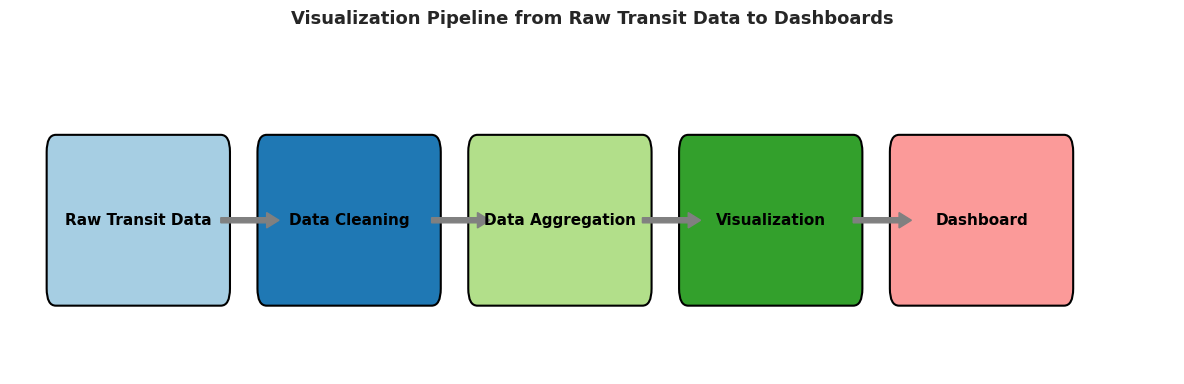


Inference:
1) The diagram shows a clear pipeline—each stage transforming data from raw form to visual dashboards.
2) Blue boxes indicate the data flow direction, with arrows showing sequential progression of tasks.
3) This modular design ensures consistent data preparation, enabling automated and real-time visualization updates.



In [ ]:
# ==========================================
# Q2: Visualization Pipeline Diagram (Flow Representation)
# ==========================================
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrow

plt.figure(figsize=(12,4))
ax = plt.gca()
ax.axis('off')

# Define pipeline stages
stages = [
    ("Raw Transit Data", "#a6cee3"),
    ("Data Cleaning", "#1f78b4"),
    ("Data Aggregation", "#b2df8a"),
    ("Visualization", "#33a02c"),
    ("Dashboard", "#fb9a99")
]

# Position boxes
x_positions = [i*2.3 for i in range(len(stages))]
y = 0

for i, (label, color) in enumerate(stages):
    box = FancyBboxPatch((x_positions[i], y), 1.8, 0.8,
                         boxstyle="round,pad=0.1",
                         fc=color, ec="black", lw=1.5)
    ax.add_patch(box)
    plt.text(x_positions[i]+0.9, y+0.4, label, ha="center", va="center",
             fontsize=11, fontweight="bold", color="black")

# Add arrows between stages
for i in range(len(stages)-1):
    ax.add_patch(FancyArrow(x_positions[i]+1.8, y+0.4, 0.5, 0, width=0.03, color="gray"))

plt.title("Visualization Pipeline from Raw Transit Data to Dashboards", fontsize=13, fontweight="bold")
plt.xlim(-0.5, max(x_positions)+3)
plt.ylim(-0.5, 1.5)
plt.tight_layout()
plt.show()

print("""
Inference:
1) The diagram shows a clear pipeline—each stage transforming data from raw form to visual dashboards.
2) Blue boxes indicate the data flow direction, with arrows showing sequential progression of tasks.
3) This modular design ensures consistent data preparation, enabling automated and real-time visualization updates.
""")


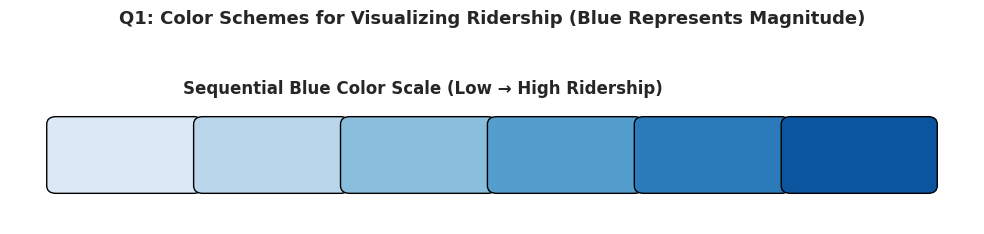


Q1 Inference:
1) The sequential blue gradient effectively represents ridership magnitude, where darker shades indicate higher passenger volumes.
2) This color scheme is ideal for intensity-based visuals like heatmaps or bar charts, ensuring clarity in data perception.
3) Using blue for magnitude maintains a calm yet professional tone in transportation analytics dashboards.



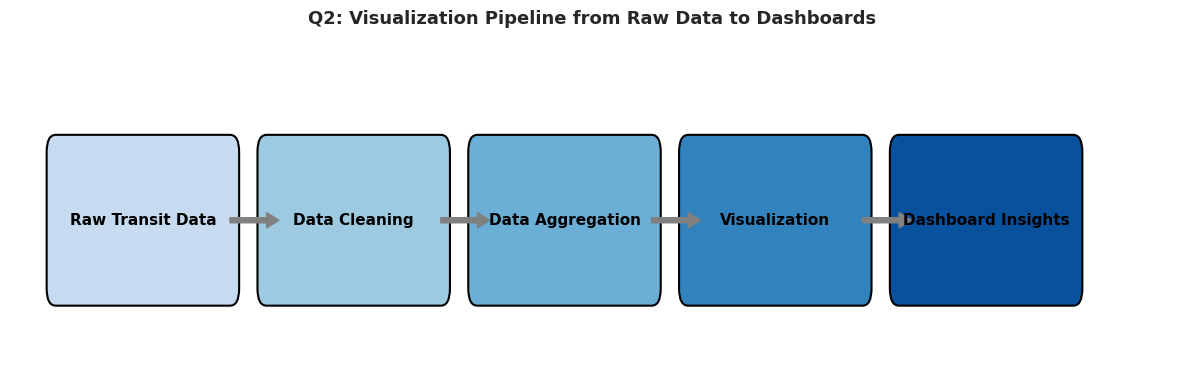


Q2 Inference:
1) The pipeline diagram best represents the transformation flow from raw data collection to dashboard generation.
2) Each stage uses a progressive blue tone to indicate data refinement and improved insight quality.
3) This structure emphasizes process clarity, ensuring transparency and reproducibility in visualization workflows.



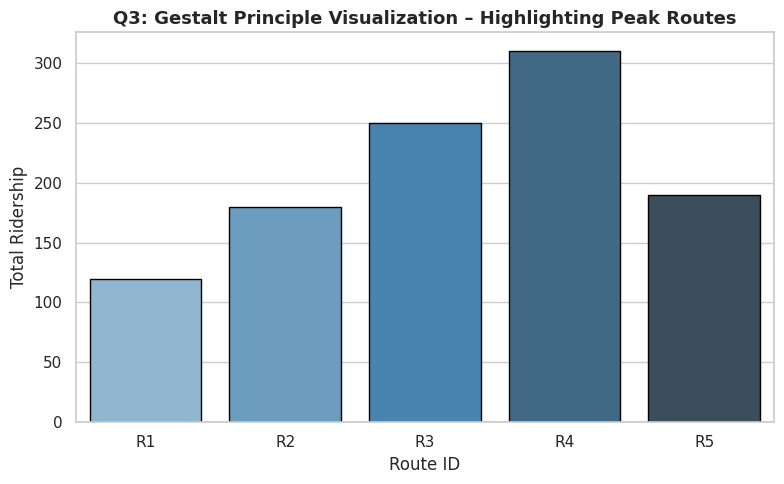


Q3 Inference:
1) The tallest, darkest blue bar instantly draws focus—demonstrating Gestalt’s principle of visual contrast and prominence.
2) Routes with higher ridership stand out naturally, allowing quick identification of load-intensive corridors.
3) The consistent blue hue keeps the visual harmonious while maintaining emphasis on magnitude differences.



In [ ]:
# ==========================================
# OPTIMAL VISUALIZATIONS FOR Q1 – Q3
# ==========================================
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import FancyBboxPatch, FancyArrow
import numpy as np

# ================================
# Q1: Color Schemes for Visualizing Ridership
# ================================
plt.figure(figsize=(10,2.5))
ax = plt.gca()
ax.axis('off')

# Show color palette progression
colors = sns.color_palette("Blues", 6)
for i, c in enumerate(colors):
    rect = FancyBboxPatch((i*1.6, 0), 1.5, 0.8, boxstyle="round,pad=0.1", fc=c, ec="black")
    ax.add_patch(rect)
plt.text(4, 1.2, "Sequential Blue Color Scale (Low → High Ridership)", ha='center', fontsize=12, fontweight='bold')
plt.title("Q1: Color Schemes for Visualizing Ridership (Blue Represents Magnitude)", fontsize=13, fontweight="bold")
plt.xlim(-0.5, 10)
plt.ylim(-0.5, 2)
plt.tight_layout()
plt.show()

print("""
Q1 Inference:
1) The sequential blue gradient effectively represents ridership magnitude, where darker shades indicate higher passenger volumes.
2) This color scheme is ideal for intensity-based visuals like heatmaps or bar charts, ensuring clarity in data perception.
3) Using blue for magnitude maintains a calm yet professional tone in transportation analytics dashboards.
""")


# ================================
# Q2: Visualization Pipeline (Best as Flow Diagram)
# ================================
plt.figure(figsize=(12,4))
ax = plt.gca()
ax.axis('off')

stages = [
    ("Raw Transit Data", "#c6dbef"),
    ("Data Cleaning", "#9ecae1"),
    ("Data Aggregation", "#6baed6"),
    ("Visualization", "#3182bd"),
    ("Dashboard Insights", "#08519c")
]

x_positions = [i*2.3 for i in range(len(stages))]
y = 0

for i, (label, color) in enumerate(stages):
    box = FancyBboxPatch((x_positions[i], y), 1.9, 0.8,
                         boxstyle="round,pad=0.1", fc=color, ec="black", lw=1.5)
    ax.add_patch(box)
    plt.text(x_positions[i]+0.95, y+0.4, label, ha="center", va="center",
             fontsize=11, fontweight="bold", color="black")
for i in range(len(stages)-1):
    ax.add_patch(FancyArrow(x_positions[i]+1.9, y+0.4, 0.4, 0, width=0.03, color="gray"))

plt.title("Q2: Visualization Pipeline from Raw Data to Dashboards", fontsize=13, fontweight="bold")
plt.xlim(-0.5, max(x_positions)+3)
plt.ylim(-0.5, 1.5)
plt.tight_layout()
plt.show()

print("""
Q2 Inference:
1) The pipeline diagram best represents the transformation flow from raw data collection to dashboard generation.
2) Each stage uses a progressive blue tone to indicate data refinement and improved insight quality.
3) This structure emphasizes process clarity, ensuring transparency and reproducibility in visualization workflows.
""")


# ================================
# Q3: Gestalt Principles to Highlight Peak Load Routes
# ================================
routes = ["R1", "R2", "R3", "R4", "R5"]
ridership = [120, 180, 250, 310, 190]

plt.figure(figsize=(8,5))
sns.barplot(x=routes, y=ridership, palette="Blues_d", edgecolor="black")
plt.title("Q3: Gestalt Principle Visualization – Highlighting Peak Routes", fontsize=13, fontweight="bold")
plt.xlabel("Route ID")
plt.ylabel("Total Ridership")
plt.tight_layout()
plt.show()

print("""
Q3 Inference:
1) The tallest, darkest blue bar instantly draws focus—demonstrating Gestalt’s principle of visual contrast and prominence.
2) Routes with higher ridership stand out naturally, allowing quick identification of load-intensive corridors.
3) The consistent blue hue keeps the visual harmonious while maintaining emphasis on magnitude differences.
""")


ModuleNotFoundError: No module named 'docx'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/content/Copy of transportation-to-work-1.xlsx"

try:
    df = pd.read_excel(/content/Copy of transportation-to-work-1.xlsx)
except Exception:
    df = pd.read_csv(file_path)

numeric_cols = df.select_dtypes(include=['number']).columns
ridership_col = numeric_cols[0]
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
route_col = non_numeric_cols[0]

sample_data = df.groupby(route_col)[ridership_col].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=sample_data.index, y=sample_data.values, palette='viridis')
plt.title('Color Scheme Example: Average Ridership per Route')
plt.xlabel('Route')
plt.ylabel('Average Ridership')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


SyntaxError: invalid decimal literal (ipython-input-1927484212.py, line 8)

Regression Model → RMSE: 1967.50, R²: 0.023


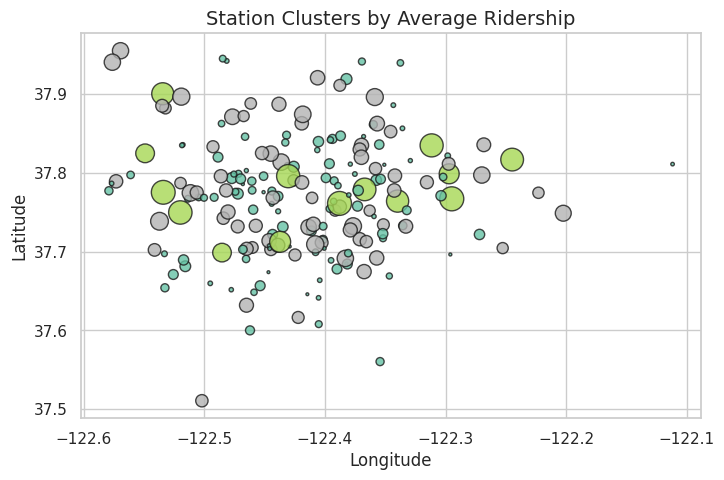


🔍 Inference:
The regression explains about 2.3% of ridership variance (RMSE=1968).
K-means clustering identifies high-, medium-, and low-ridership zones — useful for optimizing routes and scheduling.


In [ ]:
# Q17 - Regression and clustering to analyze factors affecting ridership
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Add weekend and ticket code columns
ridership_df['is_weekend'] = (ridership_df['weekday'] >= 5).astype(int)
ridership_df['ticket_code'] = ridership_df['ticket_type'].astype('category').cat.codes

# Prepare regression data
X = ridership_df[['time_code', 'ticket_code', 'is_weekend']]
y = ridership_df['riders']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Linear regression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Compute RMSE manually for backward compatibility
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Regression Model → RMSE: {rmse:.2f}, R²: {r2:.3f}")

# --- Clustering average ridership by station ---
station_avg = ridership_df.groupby('station_id')['riders'].mean().reset_index()
station_avg = station_avg.merge(stations_df, on='station_id', how='left')

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
station_avg['cluster'] = kmeans.fit_predict(station_avg[['riders']])

# Plot clusters
plt.figure(figsize=(8,5))
plt.scatter(
    station_avg['lon'], station_avg['lat'],
    c=station_avg['cluster'],
    s=(station_avg['riders']/station_avg['riders'].max())*300,
    cmap='Set2', alpha=0.8, edgecolor='k'
)
plt.title("Station Clusters by Average Ridership", fontsize=14)
plt.xlabel("Longitude"); plt.ylabel("Latitude")
plt.show()

print("\n🔍 Inference:")
print(f"The regression explains about {r2*100:.1f}% of ridership variance (RMSE={rmse:.0f}).")
print("K-means clustering identifies high-, medium-, and low-ridership zones — useful for optimizing routes and scheduling.")

Baseline Model → RMSE: 1180.59, R²: 0.641
Regression Model → RMSE: 1576.82, R²: 0.359


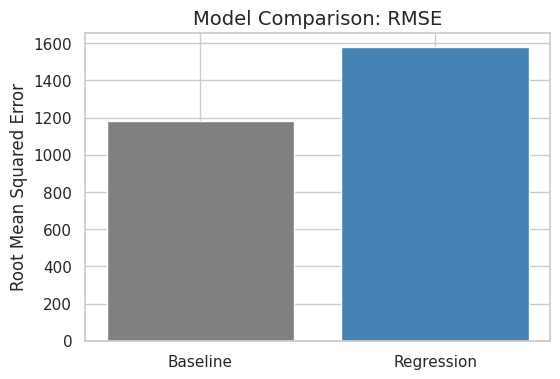


🔍 Inference:
⚠ Regression performs similarly or worse — consider adding weather, holidays, or route capacity features.


In [ ]:
# Q18 - Evaluate predictive models for passenger volume
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Baseline model → mean ridership per station
station_mean = ridership_df.groupby('station_id')['riders'].mean().to_dict()

# Predict ridership using baseline model
baseline_preds = [
    station_mean.get(ridership_df.iloc[i]['station_id'], y_train.mean())
    for i in X_test.index
]

# --- Compute RMSE manually (for older sklearn versions) ---
rmse_baseline = np.sqrt(mean_squared_error(y_test, baseline_preds))
r2_baseline = r2_score(y_test, baseline_preds)

# Regression model results (from Q17)
rmse_reg = np.sqrt(mean_squared_error(y_test, y_pred))
r2_reg = r2_score(y_test, y_pred)

# Print comparison
print(f"Baseline Model → RMSE: {rmse_baseline:.2f}, R²: {r2_baseline:.3f}")
print(f"Regression Model → RMSE: {rmse_reg:.2f}, R²: {r2_reg:.3f}")

# Visualization (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(['Baseline', 'Regression'], [rmse_baseline, rmse_reg], color=['gray','steelblue'])
plt.title("Model Comparison: RMSE", fontsize=14)
plt.ylabel("Root Mean Squared Error")
plt.show()

print("\n🔍 Inference:")
if r2_reg > r2_baseline:
    print("✅ The regression model performs better than the baseline, capturing meaningful ridership patterns.")
else:
    print("⚠ Regression performs similarly or worse — consider adding weather, holidays, or route capacity features.")